## a brief reminder on complex numbers.
*complex numbers are central to Fourier analysis, and their understanding is needed to fully commprehend the beauty of Fourier analysis*

**Real** numbers are *regular* numbers, going from $-\infty$ to $+\infty$ through -12.5, 0, 1, $\pi$, and every number you might want to use. They are said to belong to $\mathbb{R}$, the set of all real numbers, $\mathbb{R}$ can be seen as a line, going from $-\infty$ to $+\infty$.

If Reals are on a line, **Complex** numbers are on a plane. 
As any plane, the coordinates are defined on two axes, the horizontal axis is the $\mathbb{R}$ line, the vertical one is the *Imaginary* axis, also holding real numbers, and labeled with $i$.
This plane is called $\mathbb{C}$ the complex plane.

A complex number $z$ (a point in this plane) is thus described with two numbers, $a$ and $b$: $$z = a +ib$$
$a$ is the real part, and $b$ the imaginary part.

The position of the complex point $z$ can also be described by its *module* (the distance to the center)
$$ |z| = \sqrt{a^2 + b^2} $$
and the angle with the horizontal axis, called the *argument*, usually noted with a greek letter:
$$ \arg(z) = \arctan \left(\frac b a \right) = \theta$$
It is defined only between $[0 .. 2\pi]$ as any other angle.

A complex number is fully determined by $a$ and $b$, as well as by its modulus and argument.
This is noted using the *Euler* notation:
$$ z = a+ib \\
z = |z|e^{i \arg(z)} = |z|e^{i \theta} $$


*see also: [Wikipedia:Complex_plane](https://en.wikipedia.org/wiki/Complex_plane) *

Populating the interactive namespace from numpy and matplotlib


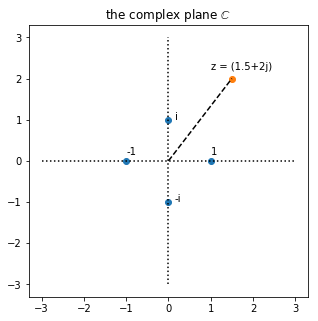

In [1]:
# let's draw this
%pylab inline
figure(figsize=(5,5))
plot([-3,3],[0,0],':k') # the real axis
plot([0,0],[-3,3],':k') # the imaginary axis
scatter([1,0,-1,0],[0,1,0,-1])
text(1,0.15,'1')
text(-1,0.15,'-1')
text(0.15,1,'i')
text(0.15,-1,'-i')
title('the complex plane $\mathbb{C}$')
z = 1.5 + 2j             #  i is noted j in python
scatter(z.real, z.imag)
plot([0,z.real],[0,z.imag],'--k')
text(1,2.2,'z = %s'%(str(z)));

The supplement to a simple cartesian plane, is that you can do arithmetic with complex numbers.
Complex numbers can be added and multiplied, they form an *algebra*.

The addition operation is simply the addition of both components.
The multiplication of two complex numbers (noted here $*$) gives a new complex number, where the modulus have been multiplied and the arguments added.
*This explains the simplicity of the Euler notation:*
$$ z_1 * z_2 = |z_1| e^{i\theta_1 }  *  |z_2| e^{i\theta_2}\\
   z_1 * z_2 = |z_1|  |z_2| e^{i(\theta_1 + \theta_2)}$$

Adding arguments (angles) is a rotation, so multiplication by a complex number is a dilatation (by the modulus - *just like multiplication by a real number* ) and a rotation (by the argument).

Multiplication by a complex numbers of modulus 1.0 is thus just a rotation by $\theta$. Those special numbers are located on the **unity circle** (of radius 1.0 and centered on {0,0}), and have a very special role.

A very special number is $i$ equal to $e^{i \pi/2}$, the basis for the imaginary numbers.
It corresponds to a rotation by $90^\circ$
Of course multiplying $i$ by itself, (rotating it by $90^\circ$) you end-up on the horizontal axis, backward.
This is the well known definition:
$$ i^2 = -1 \\$$
or
$$e^{i \pi} = -1$$


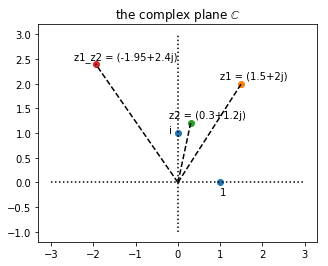

In [2]:
# let's show the effect of multiplication
figure(figsize=(5,4))
plot([-3,3],[0,0],':k') # the real axis
plot([0,0],[-1,3],':k') # the imaginary axis
scatter([1,0],[0,1])
text(1,-0.25,'1')
text(-0.2,1,'i')
title('the complex plane $\mathbb{C}$')
z1 = 1.5 +2j
z2 = 0.3 + 1.2j
z1_z2 = z1*z2 
for nz in ('z1','z2','z1_z2'):
    z = eval(nz)
    scatter(z.real,z.imag)
    plot([0,z.real],[0,z.imag],'--k')
    text(z.real-0.5,z.imag+0.1,'%s = %s'%(nz,str(z)));

In particular, the points located at $e^{2i\pi \frac k N}$ are the $N^{th}$ roots of 1, as any of these, raised to the power $N$ is equal to 1.

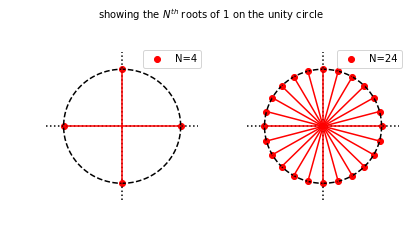

In [3]:
#let's show the roots of 1.0 on the unity circle
f,(ax1,ax2) = subplots(ncols=2,figsize=(6.6,3))
t = linspace(0,2*pi,100)
for N,ax in ((4,ax1),(24,ax2)):    # for each figure, with different N
    ax.plot([-1.3,1.3],[0,0],':k') # the real axis
    ax.plot([0,0],[-1.3,1.3],':k') # the imaginary axis
    ax.plot(cos(t),sin(t),'--k')   # the unity circle
    k = arange(0,N)          # compute the roots
    z = exp(2j * pi * k/N)         # e^(2 i pi k / N)
    ax.scatter(z.real, z.imag, c='r',edgecolors='r',label='N=%d'%N)   # draw roots
    [ ax.plot([0,zk.real],[0,zk.imag],'r') for zk in z]
    ax.legend()
    ax.set_axis_off()
f.text(0.25,1,'showing the $N^{th}$ roots of 1 on the unity circle');
    

In [4]:
# let's make it interactive
def Nroot(k=1,N=8):
    f,(ax) = subplots(figsize=(3,3))
    t = linspace(0,2*pi,100)
    ax.plot([-1.3,1.3],[0,0],':k') # the real axis
    ax.plot([0,0],[-1.3,1.3],':k') # the imaginary axis
    ax.plot(cos(t),sin(t),'--k')   # the unity circle
    z = exp(2j * pi /N)         # e^(2 i pi / N)
    zk = z**k
    ax.scatter(zk.real, zk.imag, c='r',edgecolors='r')   # draw roots
    ax.plot([0,zk.real],[0,zk.imag],'r')
    ax.set_axis_off()
    ax.set_title(r'showing $e^{2i\pi %d/%d}$ on the unity circle'%(k,N));
from ipywidgets import interactive
interactive(Nroot,k=(0,24),N=(2,48))

interactive(children=(IntSlider(value=1, description='k', max=24), IntSlider(value=8, description='N', max=48, min=2), Output()), _dom_classes=('widget-interact',))